In [1]:
#import all required libraries
import numpy as np
from scipy.special import kn
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
#setting all the constant values
from scipy import constants
hbarc= constants.value('reduced Planck constant times c in MeV fm')

In [3]:
me = 5e-4
MPL = 1.22e19

In [4]:
#defining required functions
def H(m):
    return np.sqrt(10.75 * 4*np.pi**3 / 45) * m**3 / MPL

def Y0(x ,m):
    return neq(x,m)/S(x,m)

def neq(x, m):
    return 4/(2*np.pi**2) * m**3 / x * kn(2,x)

def S(x, m):
    return 10.75*(2*np.pi**2) / 45 * m**3 / x**3

def f(x,m,lam):
    return -1*x*S(x,m)*sigma(m,lam)/H(m)

def sigma(m,lam):
    x1=1/(12*(np.pi)**0.5)
    x2=(1-(me/m)**2)**0.5
    x3=(m/(lam**2))**2
    x4 = (7+19*(me/m)**2)
    return x1*x2*x3*x4

def dYdx(x, Y, m, lam):
    return f(x,m,lam)*(Y**2-Y0(x,m)**2)

In [5]:
#Beginning Solution
t_eval=np.linspace(1,1000,1000)

In [6]:
def Y(m, lam, span):
    result = solve_ivp(dYdx, t_span = span, t_eval=t_eval, y0= [Y0(span[0],m)], args=(m,lam))
    return result.t, result.y[0]

In [7]:
def allowed(m):
    conv_cross_pb=sigma(m,1)*(hbarc**2)*(10**(-6))*(10**10)
    return conv_cross_pb**0.25

In [8]:
m_array=10**np.linspace(-3.25,1,2000) #10gev to 0.55mev
l_array = allowed(m_array) #in Gev
l_array
print(sigma(m_array,l_array)*(hbarc**2)*(10**(-6))*(10**10))

[1. 1. 1. ... 1. 1. 1.]


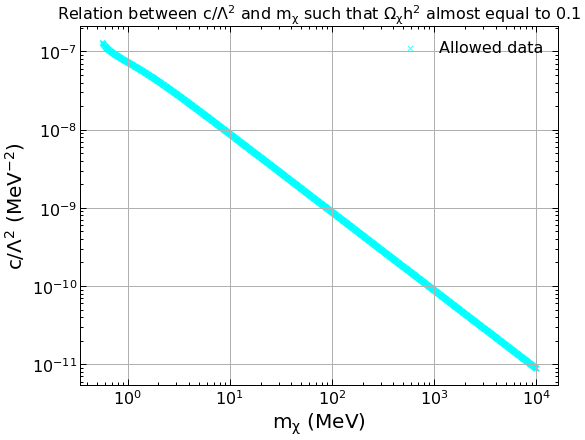

In [9]:
plt.scatter(m_array*1000,1/((l_array*1000)**2),linewidth=1,marker='x',c='cyan',s=25,alpha=0.75,label="Allowed data")
plt.semilogx()
plt.semilogy()
plt.xlabel('$\mathregular{m_{χ}}$ (MeV)', fontsize=20)
plt.grid(True)
plt.ylabel('$\mathregular{c/Λ^{2}}$ $\mathregular{(MeV^{-2})}$', fontsize=20)
plt.tight_layout()
plt.legend()
plt.title('Relation between $\mathregular{c/Λ^{2}}$ and $\mathregular{m_{χ}}$ such that $\mathregular{Ω_{χ}h^{2}}$ almost equal to 0.1')
plt.savefig('lamvsmx.png',dpi=300,bbox_inches='tight')


In [10]:

def scatter(lam,m):
    s=((m*me/((me+m)*lam**2)**2)/np.pi)*(hbarc**2)*(10**-32) #converting from GeV^-2 to cm^2
    return s

In [11]:
cross = scatter(l_array,m_array)
cross

array([5.29291165e-31, 5.18045669e-31, 5.07426487e-31, ...,
       4.97955799e-43, 4.90696341e-43, 4.83542713e-43])

In [12]:
x = [4.25701, 4.3182, 4.3182, 4.38027, 4.38027, 4.57188, 4.60462, 4.67081, 4.77188, 4.73795, 4.91005, 5.01629, 5.05221, 5.1985, 5.34902, 5.50389, 5.66326, 5.7858, 5.91099, 6.21375, 6.43946, 6.67336, 6.91575, 7.26997, 7.69706, 8.03377, 8.3852, 8.62799, 9.00542, 9.74077, 10.31301, 10.76415, 11.23502, 11.81048, 12.4154, 12.77488, 13.71978, 14.21813, 14.94636, 15.93775, 17.36262, 18.38263, 19.60194, 20.45942, 21.50733, 23.93713, 26.26392, 29.02326, 32.0725, 34.93986, 38.61071, 43.28051, 48.5151, 53.99611, 58.82353, 62.27923, 69.31525, 76.05301, 83.44566, 91.55696, 101.1761, 112.60652, 128.04012, 142.50551, 160.88496, 179.06101, 202.15505, 231.5082, 254.01185, 282.70894, 328.41222, 368.13226, 418.58767, 475.95864, 525.96403, 577.08949, 637.71993, 719.96859, 778.75915, 848.38216, 904.65437, 999.69958, 1066.0085, 1153.05568, 1265.13655, 1469.66179, 1358.71318, 1635.69746, 1769.2638, 1941.24216, 2099.7584, 2370.57057, 2545.91133, 2734.22128, 2915.5822, 2223.11399]
y = [948.31514, 689.71301, 548.01995, 427.80118, 311.14139, 251.63337, 183.01388, 140.36123, 90.19567, 111.52574, 64.44942, 46.05239, 37.90926, 27.57153, 21.1458, 16.80166, 13.34997, 10.98938, 9.0462, 6.93792, 5.51261, 4.38011, 3.66995, 2.71681, 2.12082, 1.7152, 1.41191, 1.24747, 0.97381, 0.76019, 0.64831, 0.54319, 0.4885, 0.42403, 0.37465, 0.33101, 0.29768, 0.26301, 0.23238, 0.2243, 0.19818, 0.17203, 0.15746, 0.14161, 0.11865, 0.09262, 0.07624, 0.06736, 0.05847, 0.05352, 0.04899, 0.04646, 0.04485, 0.04406, 0.04253, 0.03962, 0.03758, 0.03825, 0.03563, 0.03563, 0.03439, 0.03501, 0.03627, 0.03692, 0.03962, 0.04033, 0.04406, 0.04899, 0.05076, 0.05644, 0.06058, 0.06736, 0.07491, 0.08329, 0.09262, 0.09767, 0.11054, 0.11657, 0.12962, 0.13913, 0.14671, 0.15746, 0.17203, 0.18464, 0.19818, 0.23653, 0.20898, 0.24942, 0.27735, 0.30299, 0.31951, 0.36163, 0.39507, 0.40929, 0.44714, 0.33692]
y_act=np.array(y)*10**-36
x=np.array(x)

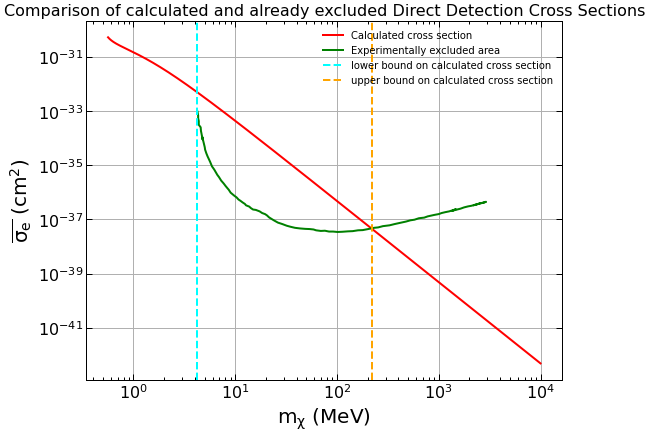

In [32]:
plt.plot(m_array*1000,cross,'r-',label="Calculated cross section")
plt.plot(x,y_act,'g-',label='Experimentally excluded area') #x and y_act are the exclusion bounds obtained from the cited paper
plt.axvline(x=4.2, color='cyan', linestyle='--', label='lower bound on calculated cross section')
plt.axvline(x=220, color='orange', linestyle='--', label='upper bound on calculated cross section')
plt.semilogx()
plt.semilogy()
plt.xlabel('$\mathregular{m_{χ}}$ (MeV)', fontsize=20)
plt.grid(True)
plt.ylabel('$\mathregular{\overline{σ_{e}}}$ $\mathregular{(cm^{2})}$', fontsize=20)
plt.tight_layout()
plt.legend(fontsize='medium')
plt.title('Comparison of calculated and already excluded Direct Detection Cross Sections')
plt.savefig('sigma_scatter.png',dpi=300,bbox_inches='tight')


In [26]:
l_array

array([  2.76371063,   2.7783847 ,   2.79259511, ..., 334.81325038,
       335.63378345, 336.45632741])

In [29]:
arr1=scatter(10**3.5 /1000,m_array)
arr2=scatter(10**4 /1000,m_array)
arr3=scatter(10**4.5 /1000,m_array)

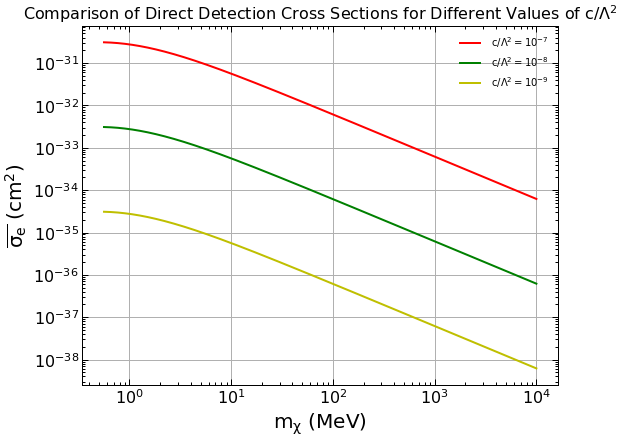

In [30]:
plt.plot(m_array*1000,arr1,'r-',label=" $\mathregular{c/Λ^{2} = 10^{-7}}$")
plt.plot(m_array*1000,arr2,'g-',label=" $\mathregular{c/Λ^{2} = 10^{-8}}$")
plt.plot(m_array*1000,arr3,'y-',label=" $\mathregular{c/Λ^{2} = 10^{-9}}$")
plt.semilogx()
plt.semilogy()
plt.xlabel('$\mathregular{m_{χ}}$ (MeV)', fontsize=20)
plt.grid(True)
plt.ylabel('$\mathregular{\overline{σ_{e}}}$ $\mathregular{(cm^{2})}$', fontsize=20)
plt.tight_layout()
plt.legend(fontsize="medium")
plt.title('Comparison of Direct Detection Cross Sections for Different Values of $\mathregular{c/Λ^{2}}$')
plt.savefig('dd.png',dpi=300,bbox_inches='tight')